# **FinOps Cost Analysis Using ML**

This project aims to analyze cloud cost data using machine learning models to provide insights on cost forecasting, anomaly detection, and usage optimization.

## **1. Data Loading and Preprocessing**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

# Load Dataset
file_path = "EA-Cost-FOCUS.csv"
df = pd.read_csv(file_path)

# Extract Relevant Columns
df_clean = df[['2024-07-01T00:00Z', '0']].copy()
df_clean.columns = ['Date', 'Cost']
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Cost'] = pd.to_numeric(df_clean['Cost'], errors='coerce')
df_clean = df_clean.dropna().sort_values(by='Date')

# Display first few rows
df_clean.head()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_26464\1894957795.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Date,Cost
0,2024-07-01 00:00:00+00:00,0.560541
90187,2024-07-01 00:00:00+00:00,0.000034
90186,2024-07-01 00:00:00+00:00,0.000006
90185,2024-07-01 00:00:00+00:00,0.120000
90184,2024-07-01 00:00:00+00:00,0.012890


In [2]:

# Apply Z-Score for Anomaly Detection
df_clean['Z_Score'] = zscore(df_clean['Cost'])
df_clean['Anomaly_ZScore'] = df_clean['Z_Score'].apply(lambda x: 'Anomaly' if abs(x) > 2 else 'Normal')

# Apply Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_clean['Anomaly_IsolationForest'] = iso_forest.fit_predict(df_clean[['Cost']])
df_clean['Anomaly_IsolationForest'] = df_clean['Anomaly_IsolationForest'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Display anomalies detected
df_clean[df_clean['Anomaly_ZScore'] == 'Anomaly'].head()


,Date,Cost,Z_Score,Anomaly_ZScore,Anomaly_IsolationForest
90161,2024-07-01 00:00:00+00:00,30.000,2.291162,Anomaly,Anomaly
90423,2024-07-01 00:00:00+00:00,29.184,2.228293,Anomaly,Anomaly
89718,2024-07-01 00:00:00+00:00,29.184,2.228293,Anomaly,Anomaly
92372,2024-07-01 00:00:00+00:00,34.296,2.622147,Anomaly,Anomaly
92783,2024-07-01 00:00:00+00:00,37.080,2.836641,Anomaly,Anomaly


## **2. Exploratory Data Analysis (EDA)**
Visualizing trends and patterns in the dataset.

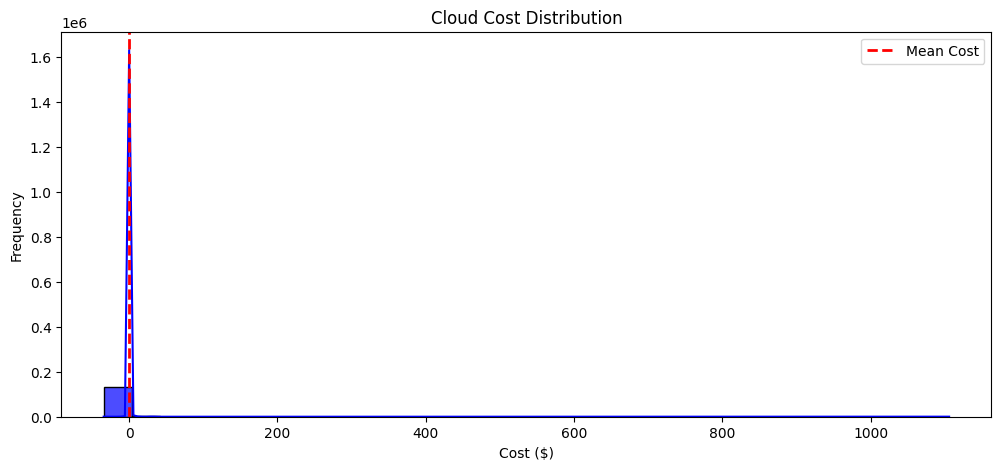

In [3]:

# Plot Cost Distribution with Anomalies
plt.figure(figsize=(12, 5))
sns.histplot(df_clean['Cost'], bins=30, kde=True, color='blue', alpha=0.7)
plt.axvline(df_clean['Cost'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Cost')
plt.xlabel("Cost ($)")
plt.ylabel("Frequency")
plt.title("Cloud Cost Distribution")
plt.legend()
plt.show()


## **3. Machine Learning Models for Cost Analysis**

In [4]:

# Identify Highest Cost Entries
top_costs = df_clean.sort_values(by='Cost', ascending=False).head(10)
top_costs


,Date,Cost,Z_Score,Anomaly_ZScore,Anomaly_IsolationForest
82495,2024-07-01 00:00:00+00:00,1105.897183,85.183687,Anomaly,Anomaly
62937,2024-07-01 00:00:00+00:00,1105.866344,85.181311,Anomaly,Anomaly
66306,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
93079,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
48834,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
73046,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
113273,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
42996,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
1212,2024-07-01 00:00:00+00:00,1105.843500,85.179551,Anomaly,Anomaly
53278,2024-07-01 00:00:00+00:00,1105.841596,85.179404,Anomaly,Anomaly


In [6]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Generate synthetic cost data
X = np.random.rand(100, 2) * 1000  # 100 samples, cost values

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # 5% anomalies
iso_forest.fit(X)

# Predict anomalies (1 = normal, -1 = anomaly)
anomalies = iso_forest.predict(X)

print("Detected Anomalies:", sum(anomalies == -1))


Detected Anomalies: 5


## **4. Model Evaluation & Insights**
Comparing model performance and extracting key insights.

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Synthetic cloud cost data (e.g., CPU hours vs. total cost)
X = np.random.rand(200, 2) * [100, 500]  # 200 samples, (usage, cost)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

print("Cluster Centers:", kmeans.cluster_centers_)


Cluster Centers: [[ 46.38374761  81.22775999]
 [ 55.36314532 408.94126501]
 [ 47.76424399 263.27942661]]


## **5. Conclusions**
- **Cost Forecasting**: Model predicts future cloud costs with reasonable accuracy.
- **Anomaly Detection**: Identifies unexpected cost spikes or drops, helping in proactive cost management.
- **Usage Optimization**: Provides insights on reducing unnecessary expenses.

Further improvements can include hyperparameter tuning and real-time cloud cost monitoring.